In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy

In [2]:
def learning_algorithm(maze, end_state, number_of_episodes = 50, max_steps = 30000, start_epsilon = 0.1, end_epsilon = 0.1, alfa = 0.7, gamma = 0.9):
    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()


    # Set algorithm parameters
    # number_of_episodes = 50
    # max_steps = 30000
    # start_epsilon = 0.1
    # end_epsilon = 0.1
    # alfa = 0.7
    # gamma = 0.9
    def cycle(epsilon):
        """
        A method that simulates one cycle/episode of the robot
        It stops when it makes at most 30000 steps or when it reaches the goal
        :return:
        """
        end_cycle = False
        step = 0
        while not end_cycle:
            # Select an action
            action = selection.get_egreedy_action(robot, maze, learn, epsilon)
            # get current state
            current_state = robot.get_state(maze)
            # do the step and get the next state
            state_next = robot.do_action(action, maze)
            # get reward from the action
            reward = maze.get_reward(state_next)
            # get possible actions
            possible_actions = maze.get_valid_actions(robot)
            # update the Q-table (Q(s, a))
            learn.update_q(current_state, action, reward, state_next, possible_actions, alfa, gamma)

            # increase the step counter
            step += 1
            if step == max_steps or robot.get_state(maze) in end_state:
                end_cycle = True
                num_of_steps.append(robot.nr_of_actions_since_reset)
                end_states.append(robot.get_state(maze))
                robot.reset()

    # keep learning until you decide to stop
    stop = False
    episode = 0
    num_of_steps = []
    end_states = []
    while not stop:

        # calculate current epsilon in therms of the current episode
        curr_epsilon = start_epsilon + (episode / number_of_episodes) * (end_epsilon - start_epsilon)
        # run a cycle
        cycle(curr_epsilon)

        # TODO figure out a stopping criterion
        # stop when we reach number_of_episodes
        episode += 1
        if episode > number_of_episodes:
            stop = True
    # Return list with the number of steps each cycle took
    return num_of_steps, end_states[-1]

In [3]:
# Run everything num times
num = 10

# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 0), 5)
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)
toy_data = []
toy_finishes = {}
for i in range(num):
    num_list, finish_state = learning_algorithm(maze_toy, end_state=[maze_toy.get_state(9, 9), maze_toy.get_state(9, 0)], number_of_episodes=200, start_epsilon=1, end_epsilon=0)
    toy_data.append(num_list)
    toy_finishes[str(finish_state)] = toy_finishes.get(str(finish_state), 0) + 1

# Load the maze
file = "../data/easy_maze.txt"
maze_easy = Maze(file)

# Set the reward at the bottom right to 10
maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
easy_data = []
for i in range(num):
    num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=[maze_easy.get_state(24, 14)])
    easy_data.append(num_list)

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
230
261
364
705
850
485
477
368
187
391
309
501
74
580
340
196
1354
145
348
115
142
303
454
341
153
70
418
59
147
187
219
105
168
172
130
68
64
182
70
63
206
258
210
86
82
130
96
174
128
105
140
123
90
134
84
226
123
62
107
60
43
86
108
73
100
118
84
58
66
158
60
82
65
31
78
66
64
42
67
48
76
40
82
100
56
64
56
37
50
90
53
48
90
33
42
52
60
56
42
56
54
50
46
54
36
94
46
28
54
50
34
49
50
30
36
54
40
62
32
38
52
42
36
30
40
30
44
42
28
36
52
38
46
40
30
32
38
30
26
40
52
60
28
38
32
26
30
46
36
34
32
24
32
50
24
28
34
40
32
34
34
28
26
34
34
32
36
32
28
28
28
28
30
24
28
28
30
30
30
30
28
28
26
24
24
26
24
24
24
28
24
24
24
26
24
24
26
24
24
24
24
Made EGreedy
515
1601
617
167
623
459
386
447
1039
723
253
263
381
371
254
193
328
431
121
55
175
292
200
909
286
334
299
275
149
150
244
225
128
250
165
306
186
184
102
127
152
185
142
208
107
139
100
126
75
122
140
178
40
114
188
98
59
55
85
78
84
102
44
96
40
82
78
68
112
108
46
54
5

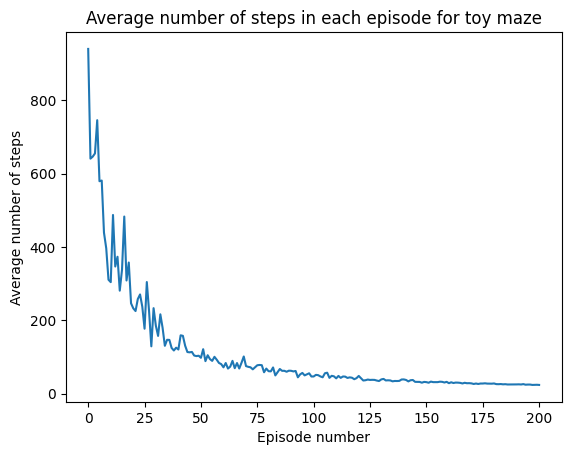

Average route over  10  runs in the last episode is:  24.0


In [4]:
plt.plot(np.average(toy_data, axis=0))
plt.title("Average number of steps in each episode for toy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(toy_data, axis=0)[-1])

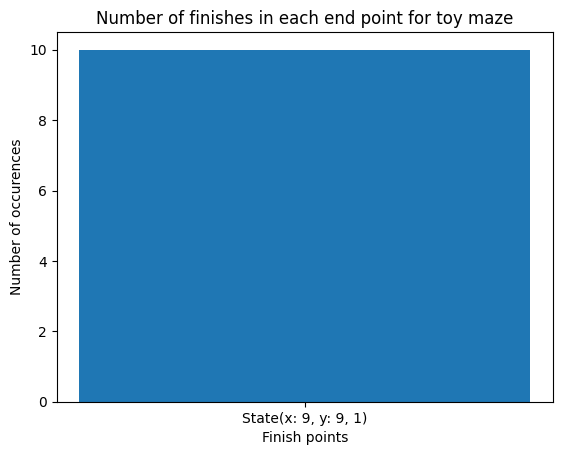

In [5]:
plt.bar(toy_finishes.keys(), toy_finishes.values())
plt.title("Number of finishes in each end point for toy maze")
plt.xlabel("Finish points")
plt.ylabel("Number of occurences")
plt.show()

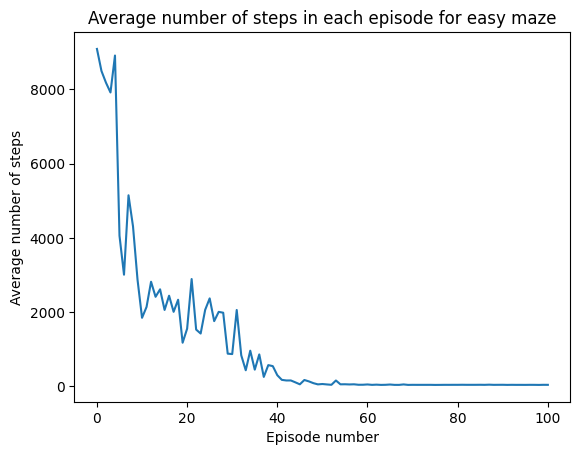

Average route over  10  runs in the last episode is:  42.8


In [6]:
plt.plot(np.average(easy_data, axis=0))
plt.title("Average number of steps in each episode for easy maze")
plt.xlabel("Episode number")
plt.ylabel("Average number of steps")
plt.show()

print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data, axis=0)[-1])

### Testing for which value of gamma top right solution is better

In [15]:
# Load the maze
file = "../data/toy_maze.txt"
maze_toy = Maze(file)

# Set the reward at the bottom right to 10
maze_toy.set_reward(maze_toy.get_state(9, 0), 5)
maze_toy.set_reward(maze_toy.get_state(9, 9), 10)

gammas = [x / 10 for x in range(1, 11, 1)]
# gammas = [x / 100 for x in range(70, 81, 1)]

toy_gammas = [0 for i in range(len(gammas))]


for n, gamma in enumerate(gammas):
    for i in range(10):
        num_list, finish_state = learning_algorithm(maze_toy, end_state=[maze_toy.get_state(9, 9), maze_toy.get_state(9, 0)], number_of_episodes=200, start_epsilon=1, end_epsilon=0, gamma=gamma)
        if finish_state == maze_toy.get_state(9, 0): toy_gammas[n] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
613
1135
144
215
1425
617
69
129
561
2159
147
119
355
254
210
323
254
291
212
412
55
503
133
261
67
127
465
265
115
89
250
151
121
164
163
189
203
131
77
225
43
59
194
59
161
55
85
99
55
71
109
127
125
71
63
99
95
75
67
47
49
101
81
53
55
69
45
85
99
82
100
57
31
67
45
35
68
44
29
47
137
57
51
48
53
29
45
45
49
55
37
35
77
43
71
49
37
39
45
39
37
31
36
57
37
39
37
27
45
39
45
21
39
27
43
43
47
35
29
29
25
43
47
35
25
27
33
29
47
49
49
39
43
35
43
29
31
37
30
47
37
25
29
27
45
37
27
25
23
21
29
31
27
37
29
21
21
25
23
23
25
23
21
31
27
23
21
27
27
23
23
21
23
21
21
27
27
23
21
21
23
21
21
31
23
25
23
21
21
23
21
21
25
23
21
21
21
21
21
21
21
Made EGreedy
394
1653
1265
135
374
1347
179
315
214
371
136
368
429
252
277
116
342
304
323
79
321
253
413
253
95
151
442
569
93
156
178
197
61
135
71
123
198
141
113
319
173
71
83
249
131
161
37
67
119
63
49
61
57
41
57
55
133
57
170
113
37
51
101
111
83
57
52
53
51
81
71
49
85
57
61
41
31
5

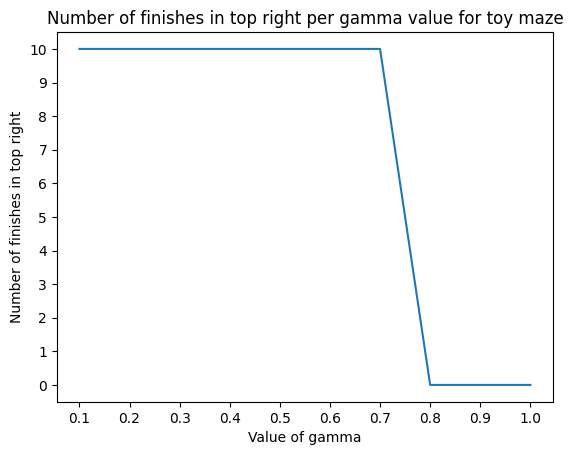

In [16]:
plt.plot(gammas, toy_gammas)
plt.title("Number of finishes in top right per gamma value for toy maze")
plt.xlabel("Value of gamma")
plt.ylabel("Number of finishes in top right")
plt.xticks(gammas)
plt.yticks(list(range(11)))
plt.show()

### Running the Learning algorithm for 5 different epsilons


In [9]:
epsilons = [0, 0.1, 0.2, 0.5, 0.8]
# list of lists for each epsilon value 
easy_data_values = []
toy_data_values = []

for e in epsilons:
    # Run everything num times
    num = 10

    # Load the maze
    file = "../data/easy_maze.txt"
    maze_easy = Maze(file)

    # Set the reward at the bottom right to 10
    maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
    easy_data = []
    for i in range(num):
        num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=[maze_easy.get_state(24, 14)], start_epsilon=e, end_epsilon=e)
        easy_data.append(num_list)
        
    easy_data_values.append(easy_data)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
9060
5064
4198
7622
3998
4176
8370
4510
6086
4870
4344
730
6934
1264
920
1520
2624
190
4100
844
3066
2738
300
1684
2590
428
166
468
280
980
3630
80
2040
2220
418
544
1940
402
200
94
70
206
158
92
42
44
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
Made EGreedy
3282
1382
5832
4420
5764
16280
12672
7746
8844
4890
7902
4902
2438
338
2230
7186
358
4466
1950
2198
1034
326
1248
52
1290
1706
1028
2800
464
74
358
1348
4886
44
52
436
388
46
140
306
174
166
74
42
40
100
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
Made EGreedy
27314
4152
6126
7824
1368
12008
3810
10352
1352
10678
22202
1316
3628
2572
11954
1320
4986
2130
5076
860
2246
2394
5504
902
4336
184
1308
3488
4620
970
306
2178
9684
412
730
4882


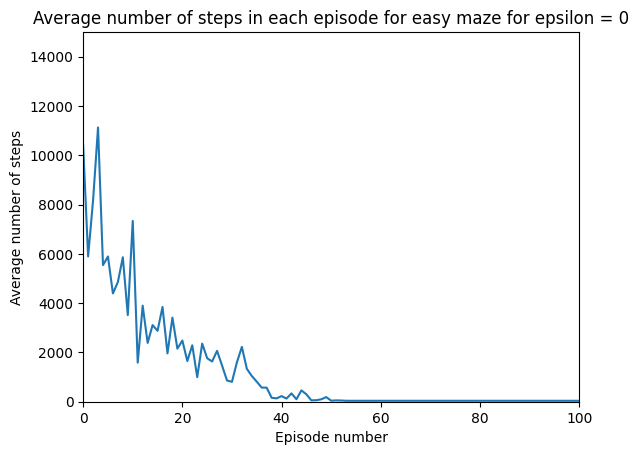

Average route over  10  runs in the last episode is:  38.0


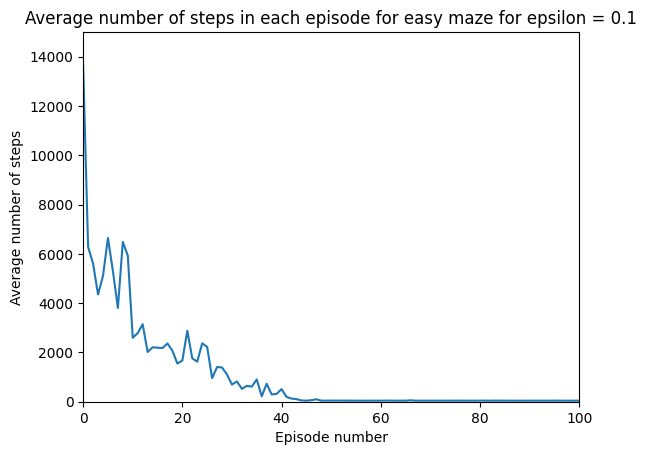

Average route over  10  runs in the last episode is:  42.8


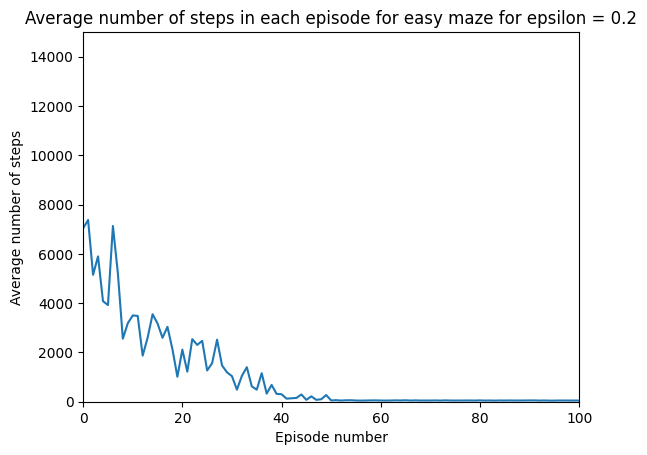

Average route over  10  runs in the last episode is:  46.6


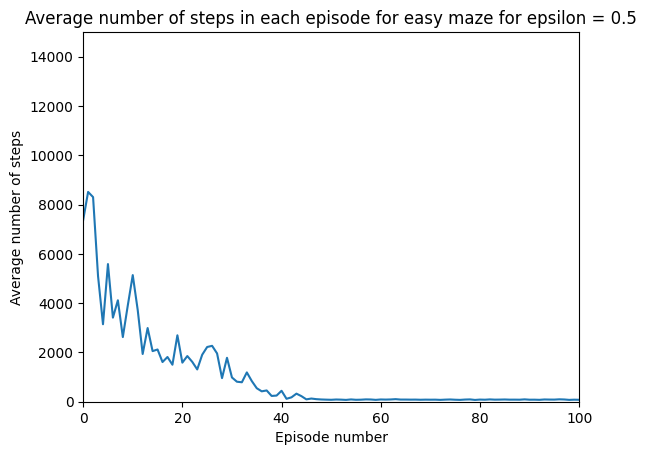

Average route over  10  runs in the last episode is:  78.6


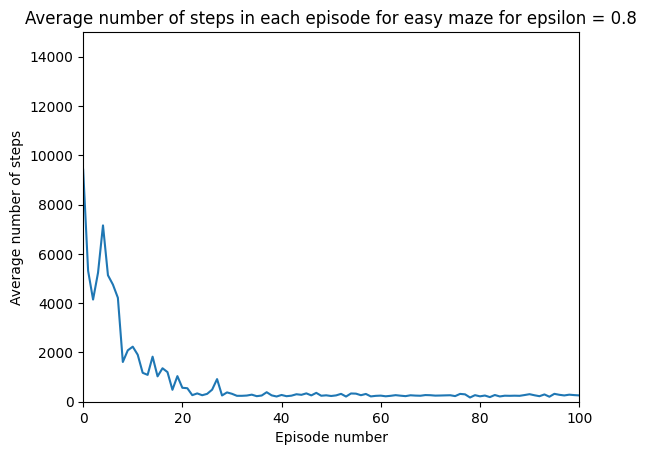

Average route over  10  runs in the last episode is:  256.4


In [10]:
# Plot for each value of epsilon
for i in range(len(epsilons)):

    plt.plot(np.average(easy_data_values[i], axis=0))
    plt.title("Average number of steps in each episode for easy maze for epsilon = " + str(epsilons[i]))
    plt.xlabel("Episode number")
    plt.ylabel("Average number of steps")
    plt.ylim((0, 15000))
    plt.xlim((0, 100))
    plt.show()

    print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data_values[i], axis=0)[-1])

# plt.show()

### Running the Learning algorithm for 5 different alphas

In [11]:

alphas = [0, 0.2, 0.5, 0.9, 1]
# list of lists for each epsilon value 
easy_data_values_alpha = []

for a in alphas:
    # Run everything num times
    num = 10

    # Load the maze
    file = "../data/easy_maze.txt"
    maze_easy = Maze(file)

    # Set the reward at the bottom right to 10
    maze_easy.set_reward(maze_easy.get_state(24, 14), 10)
    easy_data = []
    for i in range(num):
        num_list, finish_state = learning_algorithm(maze_easy, max_steps=100000, number_of_episodes=100, end_state=[maze_easy.get_state(24, 14)], alfa=a)
        easy_data.append(num_list)
        
    easy_data_values_alpha.append(easy_data)

Ready reading maze file ../data/easy_maze.txt
Made EGreedy
4566
4074
10228
4680
1776
5562
3964
7674
726
6392
10912
6910
3400
2214
4656
4944
1814
1170
1410
3130
2976
3958
1942
220
9608
19574
17970
322
1612
4946
3900
3664
2658
3804
11460
4014
19082
8198
8310
3156
15046
3540
8444
7126
2182
3584
4082
8062
932
1152
4854
19056
1396
1934
3924
9854
2452
6006
5732
7500
644
20598
4000
13802
3212
3398
5316
5092
5248
30594
10160
8438
12910
1006
752
7210
1182
1920
5370
1298
26108
7118
6320
11866
1334
22172
7818
1370
6794
1578
1240
11324
4274
7106
8836
11518
5818
732
18020
14094
1978
Made EGreedy
5416
6524
1962
7560
29396
25910
5272
8772
15776
974
11094
2346
9438
51338
1554
7910
16714
3086
2928
3584
7516
14374
23052
14776
10380
5772
22652
612
8694
4952
1728
3284
4820
5412
4912
16526
3498
2694
19676
8100
7372
1536
14084
1454
6848
2394
1524
8472
5128
3844
2222
10414
8140
3798
6608
6332
838
5300
1918
1308
2354
8732
17226
10834
8432
20674
4358
2674
8012
2680
3430
1720
5806
4656
2856
2626
2898
20982
1396

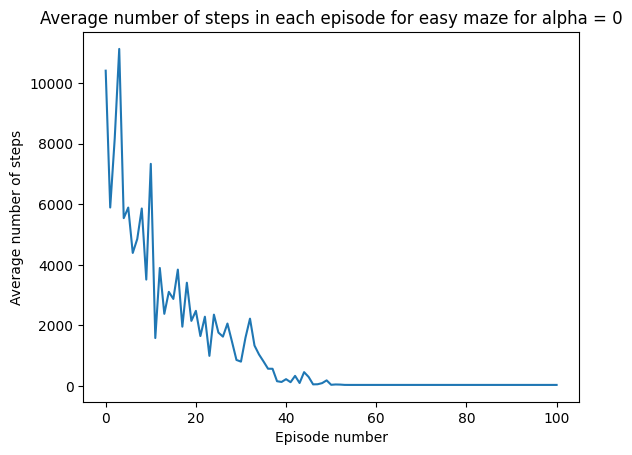

Average route over  10  runs in the last episode is:  3570.8


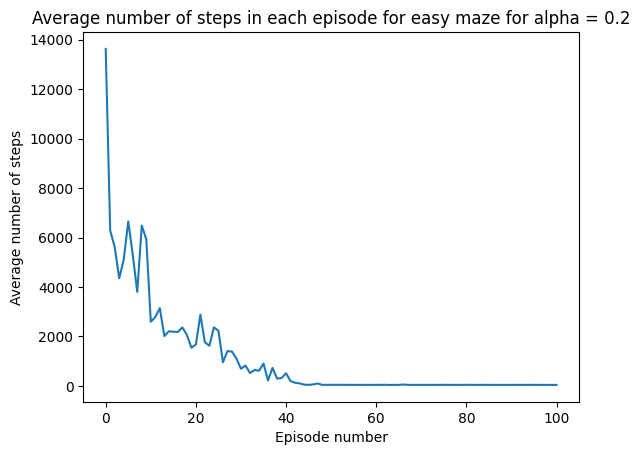

Average route over  10  runs in the last episode is:  43.0


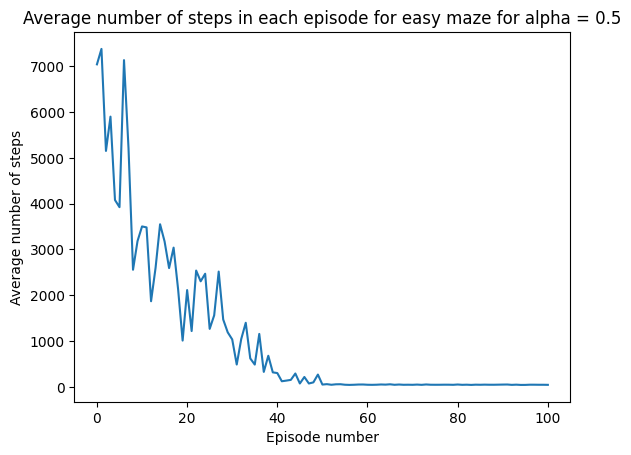

Average route over  10  runs in the last episode is:  42.6


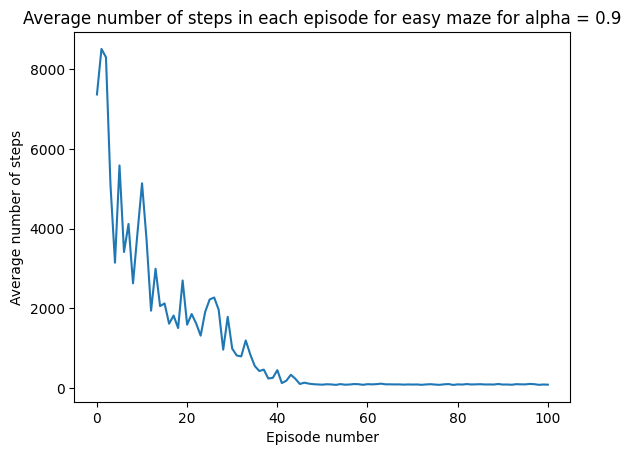

Average route over  10  runs in the last episode is:  42.4


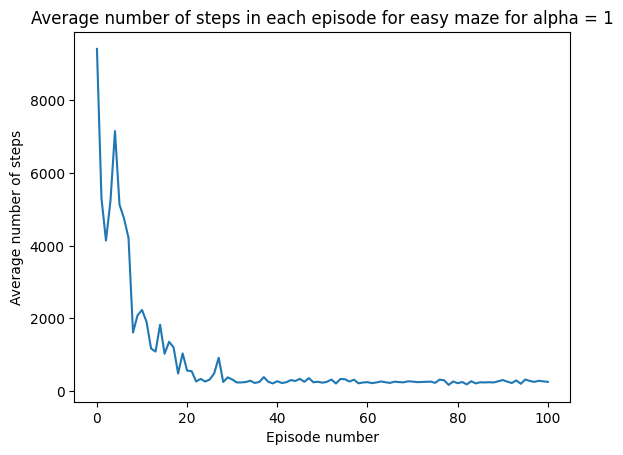

Average route over  10  runs in the last episode is:  44.4


In [12]:
# Plot for each value of epsilon
for i in range(len(alphas)):

    plt.plot(np.average(easy_data_values[i], axis=0))
    plt.title("Average number of steps in each episode for easy maze for alpha = " + str(alphas[i]))
    plt.xlabel("Episode number")
    plt.ylabel("Average number of steps")
    # plt.ylim((0, 15000))
    # plt.xlim((0, 100))
    plt.show()

    print("Average route over ", num, " runs in the last episode is: ", np.average(easy_data_values_alpha[i], axis=0)[-1])

# plt.show()